In [1]:
import numpy as np
import os
import pandas as pd


os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
Sample_Num = 5000
start = []
for i in range(Sample_Num ):
    start.append(2*np.pi * np.random.random()-np.pi)
    
    
deg_120 = np.pi*120/180
lattice = [] 
for i in range(Sample_Num ):
    line_1 = []
    line_2 = []
    line_3 = []
    for j in range(15):
        line_1.append(start[i]+j*deg_120) 
    for j in range(15):
        line_2.append(start[i]+j*deg_120 + deg_120)
    for j in range(15):
        line_3.append(start[i]+j*deg_120 + 2 * deg_120)
    lattice.append(np.reshape(np.vstack((line_1,line_2,line_3)*5),[225]))

    
    
lattice = np.asarray(lattice)
lat_cos = np.zeros((Sample_Num ,225))
lat_sin = np.zeros((Sample_Num ,225))
for i in range(Sample_Num ):
    lat_cos[i]= np.cos(lattice[i])
    lat_sin[i]= np.sin(lattice[i])
test_artificial = np.hstack((lat_cos,lat_sin))

start = []
for i in range(Sample_Num ):
    start.append(2*np.pi * np.random.random()-np.pi)    
    
deg_120 = - np.pi*120/180
lattice_2 = [] 
for i in range(Sample_Num ):
    line_1 = []
    line_2 = []
    line_3 = []
    for j in range(15):
        line_1.append(start[i]+j*deg_120) 
    for j in range(15):
        line_2.append(start[i]+j*deg_120 + deg_120)
    for j in range(15):
        line_3.append(start[i]+j*deg_120 + 2 * deg_120)
    lattice_2.append(np.reshape(np.vstack((line_1,line_2,line_3)*5),[225]))
    
lat_cos_2 = np.zeros((Sample_Num ,225))
lat_sin_2 = np.zeros((Sample_Num ,225))
for i in range(Sample_Num ):
    lat_cos_2[i]= np.cos(lattice_2[i])
    lat_sin_2[i]= np.sin(lattice_2[i])
    
test_artificial_2 = np.hstack((lat_cos_2,lat_sin_2))
artificial_data = np.vstack((test_artificial,test_artificial_2))

In [244]:
'''''This script demonstrates how to build a variational autoencoder with Keras. 
 
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114 
'''  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
  
from keras.layers import Input, Dense, Lambda,Conv2D, MaxPooling2D,Flatten, Reshape
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys  
#import tensorflow as tf

batch_size = 100  
original_dim = 450 
row = 15
col = 15
channel = 2
latent_dim = 4
intermediate_dim = 100
nb_epoch = 100  
epsilon_std = 1.0  

#my tips:encoding  
x = Input(shape=(original_dim,))
#x_res = Reshape([row,col,channel])(x)
#conv1 = Conv2D(32 ,(3,3),padding='same',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0),activation='relu')(x_res)
#pool1 = MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default')(conv1)
#conv2 = Conv2D(32 ,(3,3),padding='same',kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=0),activation='relu')(pool1)
#pool2 = MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='same', dim_ordering='default')(conv2)
#conv_flat = Flatten()(pool1)
#h = Dense(intermediate_dim, activation='relu')(conv_flat)  
z_mean = Dense(latent_dim)(x)  
z_log_var = Dense(latent_dim)(x)  

#my tips:Gauss sampling,sample Z  
def sampling(args):   
    z_mean, z_log_var = args  
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)  
    return z_mean + K.exp(z_log_var / 2) * epsilon  
  
# note that "output_shape" isn't necessary with the TensorFlow backend  
# my tips:get sample z(encoded)  
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])


# we instantiate these layers separately so as to reuse them later  
#decoder_h = Dense(intermediate_dim, activation='relu')(z) 
decoder_mean = Dense(original_dim, activation='sigmoid')(z)

#x_res = np.reshape(x,(-1,450))

def vae_loss(x, decoder_mean):  
    xent_loss = original_dim * objectives.binary_crossentropy(x,decoder_mean)  
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)  
    return xent_loss + 10000*kl_loss  
  
vae = Model(x, decoder_mean)  
vae.compile(optimizer='rmsprop', loss=vae_loss)  

newdata = artificial_data
T = np.zeros((1,len(newdata)))

#for i in range(len(newdata)):
#    for j in range(len(newdata[0])):
#        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
T = T[0]
T = T[index]

for i in range(1050):
    newdata[i] = -newdata[i]
    
newdata = newdata[index]
T = T[index]


x_train = newdata[:8000]
x_test = newdata[8000:]


In [245]:
import keras
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')


vae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=nb_epoch,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test),callbacks=[EarlyStopping])  
# encode and decode some digits
# note that we take them from the *test* set
# use Matplotlib (don't ask)


/home/ai-i-sunhao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 0s - loss: 871.8286 - val_loss: 552.9237
Epoch 2/100
8000/8000 [==============================] - 0s - loss: 465.2246 - val_loss: 426.8059
Epoch 3/100
8000/8000 [==============================] - 0s - loss: 449.9154 - val_loss: 346.1850
Epoch 4/100
8000/8000 [==============================] - 0s - loss: 437.7778 - val_loss: 394.9108
Epoch 5/100
8000/8000 [==============================] - 0s - loss: 421.0487 - val_loss: 416.3266
Epoch 6/100
8000/8000 [==============================] - 0s - loss: 403.6536 - val_loss: 303.8205
Epoch 7/100
8000/8000 [==============================] - 0s - loss: 394.3255 - val_loss: 426.5567
Epoch 8/100
8000/8000 [==============================] - 0s - loss: 377.8534 - val_loss: 396.3923
Epoch 9/100
8000/8000 [==============================] - 0s - loss: 369.8624 - val_loss: 287.4841
Epoch 10/100
8000/8000 [==============================] - 0s - loss: 3

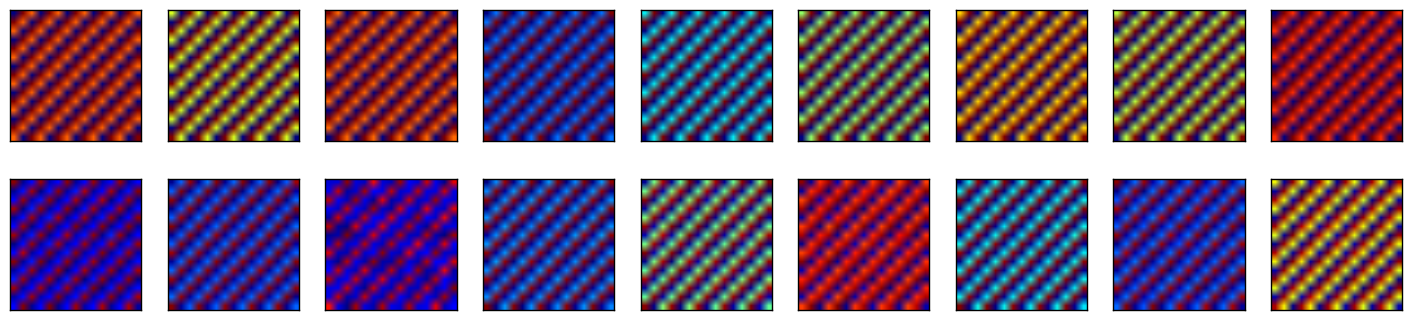

In [246]:
import matplotlib.pyplot as plt

#encoded_imgs = encoder.predict(x_test)
decoded_imgs = vae.predict(x_test,batch_size=100)
size = 15

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2,n,i)
    plt.imshow(x_test[i][:225].reshape(size, size))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n ,i + n)
    plt.imshow(decoded_imgs[i][:225].reshape(size,size))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

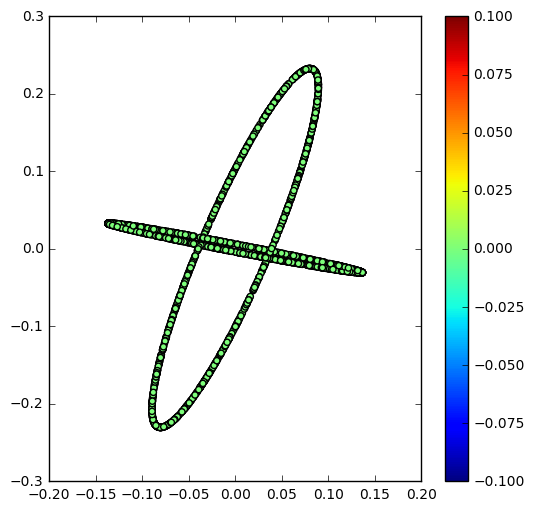

In [247]:

y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= (np.sum(x_test[i])-512)*2

T_test = T[8000:]

encoder = Model(x, z_mean)

# display a 2D plot of the digit classes in the latent space  
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
#plt.scatter( x_test_encoded[:, 0] ,y_test , c=T_test)  
plt.scatter( x_test_encoded[:, 0] ,x_test_encoded[:, 1] , c=T_test)  
plt.colorbar()
plt.show()  
  


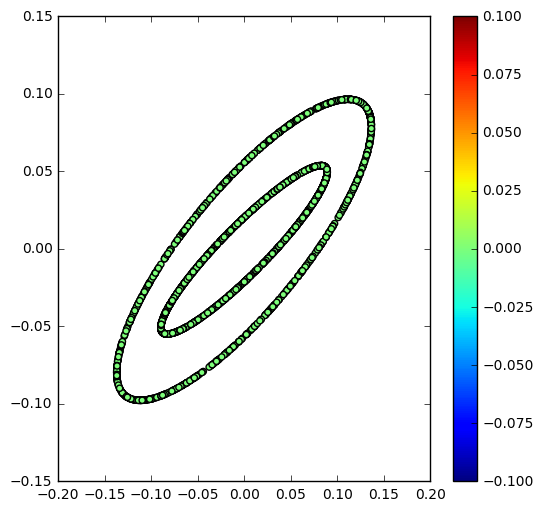

In [248]:

y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= (np.sum(x_test[i])-512)*2

T_test = T[8000:]

encoder = Model(x, z_mean)

# display a 2D plot of the digit classes in the latent space  
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
#plt.scatter( x_test_encoded[:, 0] ,y_test , c=T_test)  
plt.scatter( x_test_encoded[:, 0] ,x_test_encoded[:, 2] , c=T_test)  
plt.colorbar()
plt.show()  
  


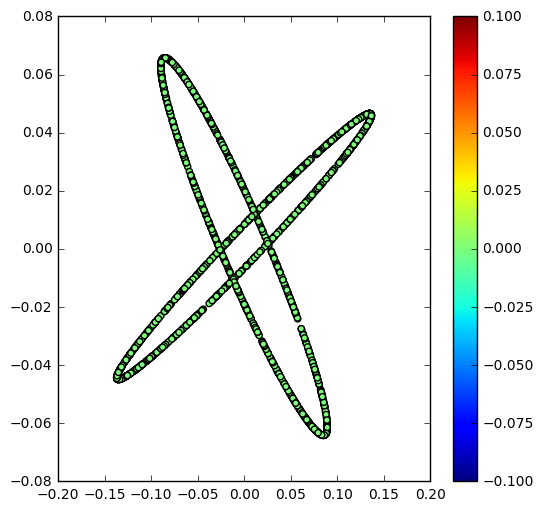

In [249]:

y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= (np.sum(x_test[i])-512)*2

T_test = T[8000:]

encoder = Model(x, z_mean)

# display a 2D plot of the digit classes in the latent space  
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
#plt.scatter( x_test_encoded[:, 0] ,y_test , c=T_test)  
plt.scatter( x_test_encoded[:, 0] ,x_test_encoded[:, 3] , c=T_test)  
plt.colorbar()
plt.show()  
  


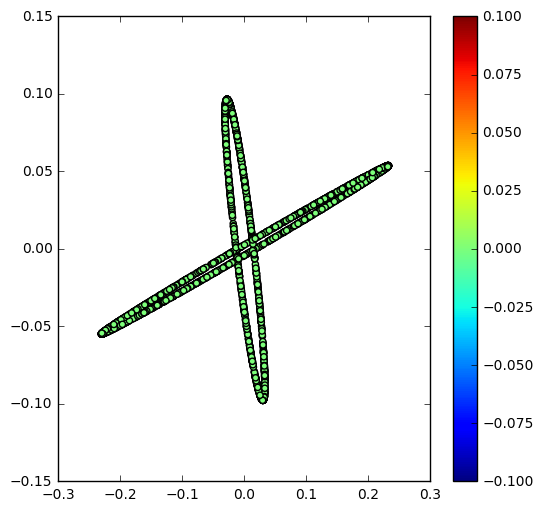

In [250]:

y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= (np.sum(x_test[i])-512)*2

T_test = T[8000:]

encoder = Model(x, z_mean)

# display a 2D plot of the digit classes in the latent space  
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
#plt.scatter( x_test_encoded[:, 0] ,y_test , c=T_test)  
plt.scatter( x_test_encoded[:, 1] ,x_test_encoded[:, 2] , c=T_test)  
plt.colorbar()
plt.show()  
  


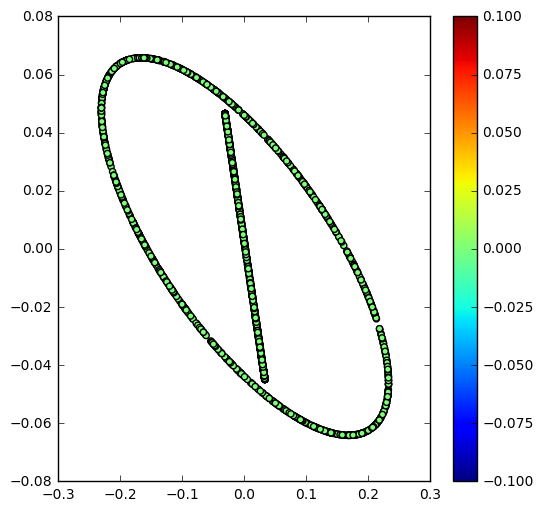

In [251]:

y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= (np.sum(x_test[i])-512)*2

T_test = T[8000:]

encoder = Model(x, z_mean)

# display a 2D plot of the digit classes in the latent space  
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
#plt.scatter( x_test_encoded[:, 0] ,y_test , c=T_test)  
plt.scatter( x_test_encoded[:, 1] ,x_test_encoded[:, 3] , c=T_test)  
plt.colorbar()
plt.show()  
  


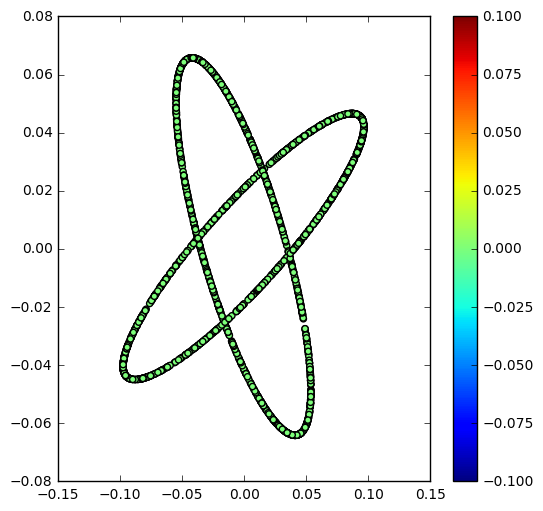

In [252]:

y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= (np.sum(x_test[i])-512)*2

T_test = T[8000:]

encoder = Model(x, z_mean)

# display a 2D plot of the digit classes in the latent space  
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
#plt.scatter( x_test_encoded[:, 0] ,y_test , c=T_test)  
plt.scatter( x_test_encoded[:, 2] ,x_test_encoded[:, 3] , c=T_test)  
plt.colorbar()
plt.show()  
  


In [253]:
vae.layers[1].get_weights()[0].T[0].shape

(450,)

In [254]:
print(np.matmul(np.reshape((vae.layers[1].get_weights()[0].T[0]),[1,450]),np.reshape((vae.layers[1].get_weights()[0].T[1]),[450,1])))
print(np.matmul(np.reshape((vae.layers[1].get_weights()[0].T[0]),[1,450]),np.reshape((vae.layers[1].get_weights()[0].T[2]),[450,1])))
print(np.matmul(np.reshape((vae.layers[1].get_weights()[0].T[0]),[1,450]),np.reshape((vae.layers[1].get_weights()[0].T[3]),[450,1])))
print(np.matmul(np.reshape((vae.layers[1].get_weights()[0].T[1]),[1,450]),np.reshape((vae.layers[1].get_weights()[0].T[2]),[450,1])))
print(np.matmul(np.reshape((vae.layers[1].get_weights()[0].T[1]),[1,450]),np.reshape((vae.layers[1].get_weights()[0].T[3]),[450,1])))
print(np.matmul(np.reshape((vae.layers[1].get_weights()[0].T[2]),[1,450]),np.reshape((vae.layers[1].get_weights()[0].T[3]),[450,1])))


[[ 0.11291794]]
[[-0.01768191]]
[[-0.31292671]]
[[-0.00877141]]
[[-0.07135208]]
[[ 0.06312965]]


In [294]:
A = [[[-0.66808927]],
[[-1.16526425]],
[[-0.80356842]],
[[ 0.93500602]],
[[-0.04527206]],
[[ 0.79326713]]]

In [295]:
A = np.asarray(A)

In [296]:
sum(np.abs(A))

array([[ 4.41046715]])

In [258]:
np.std(A)

0.13599030354817443